In [1]:
from keras.preprocessing.image import img_to_array
import imutils
import cv2
from keras.models import load_model
import numpy as np
from PIL import Image

import glob
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

EMOTIONS = ["angry" ,"disgust","scared", "happy", "sad", "surprised",
 "neutral"]

def load_models(detection_model_path = 'Emotion-recognition/haarcascade_files/haarcascade_frontalface_default.xml', 
                emotion_model_path = 'Emotion-recognition/models/_mini_XCEPTION.102-0.66.hdf5'):
    face_detection = cv2.CascadeClassifier(detection_model_path)
    emotion_classifier = load_model(emotion_model_path, compile=False)
    return face_detection, emotion_classifier


def load_img(path):
    img = Image.open(path)
    img = img.resize((64, 64)).convert('LA')
    roi = img_to_array(img)[:,:,[0]] / 255.0
    roi = np.expand_dims(roi, axis=0)
    return roi

def pred2emotions(preds): return list(zip(EMOTIONS, preds))

Using TensorFlow backend.


In [ ]:
# Статистика без будущего
# Объединить 2 и 3 класс
# Отрефакторить код
# Метрики - pr, rec on 1 class
# 

In [329]:
# df[['user_id', 'y']].groupby('user_id').boxplot()

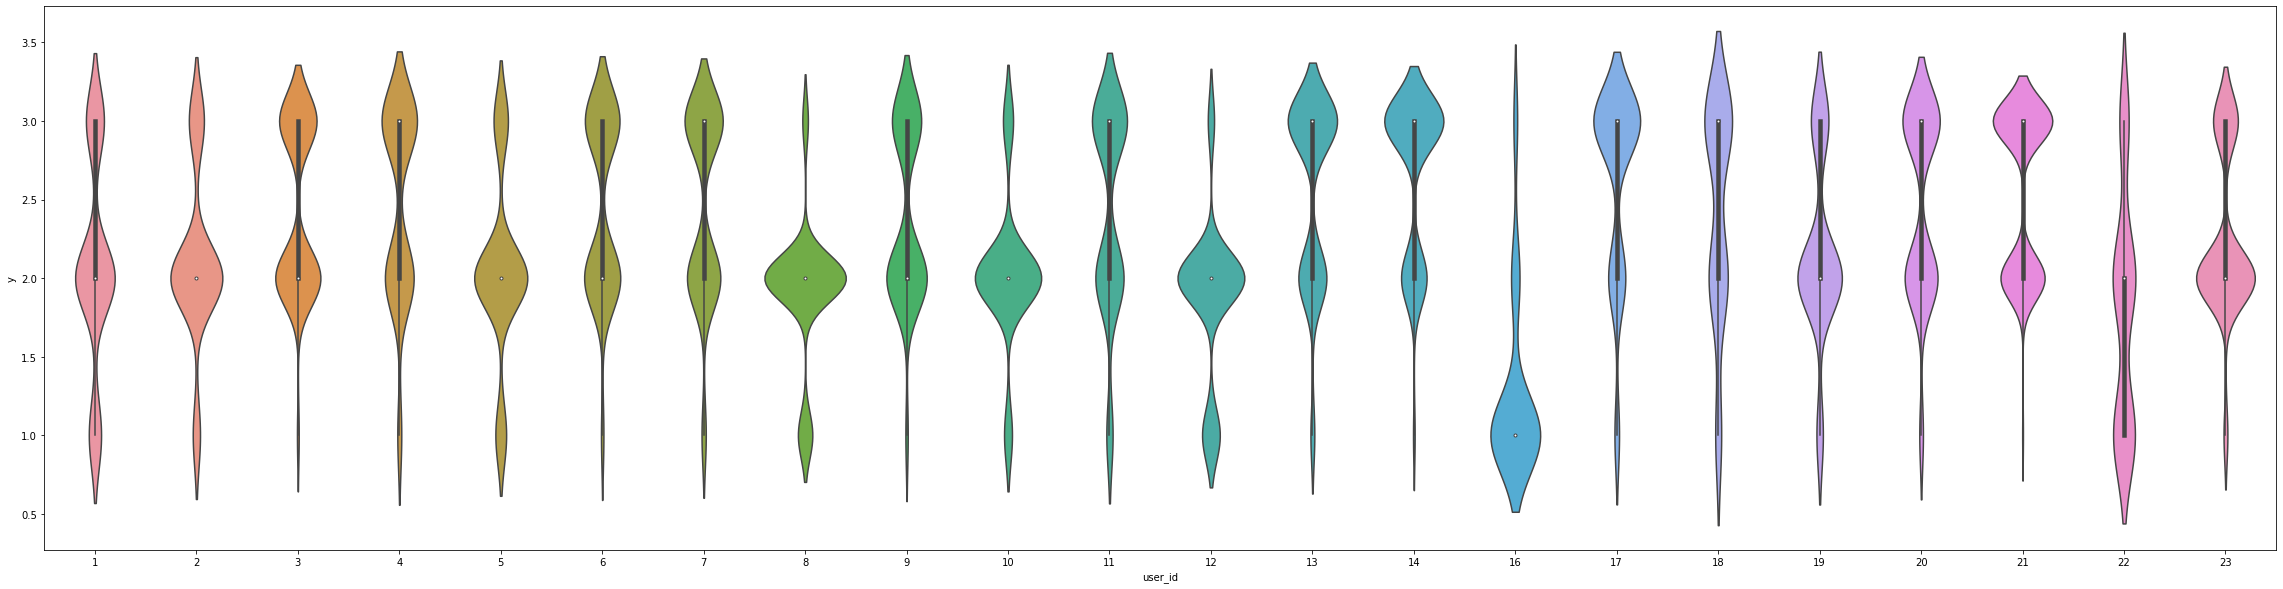

In [324]:
import seaborn as sns
plt.figure(figsize = (40, 10))
sns.violinplot(x='user_id', y='y', data=df)

In [328]:
# df[(df['user_id']==16) & (df['y']!=1)]

In [318]:
# df.groupby('user_id')['y']
# import seaborn as sns
!pip install seaborn

     |████████████████████████████████| 215 kB 719 kB/s eta 0:00:01


In [ ]:
# Фичи со скользищим средним (есть ли зав от времени)
# Std, mean, ... эмоции по юзеру
# Отнормировать фичи внутри каждого юзера

In [2]:
face_detection, emotion_classifier = load_models()

predictions = []
for path in tqdm_notebook(glob.glob('data/wacv2016/dataset/**', recursive = True)):
    if path.endswith('.jpg'):
        roi = load_img(path)
        preds = emotion_classifier.predict(roi)[0]
        predictions.append((path, preds))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [4]:
fn_list = []
for path in tqdm_notebook(glob.glob('data/wacv2016/dataset/**', recursive = True)):
    if path.endswith('.jpg'):
        fn_list.append(path)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [11]:
X             = np.array([i[1] for i in predictions])
fn_list       = [i[0] for i in predictions]
y_list        = [int(i.split('/')[-2]) for i in fn_list]
user_id_list  = [int(i.split('/')[-1].split('_')[0].replace('img', '')) for i in fn_list]
image_id_list = [int(i.split('/')[-1].split('_')[1].split('.')[0]) for i in fn_list]

In [90]:
# fn_list[:10]
# df

In [49]:
# len(set(user_id_list))

In [18]:
dct = {"fn":fn_list, 'y':y_list, 'user_id':user_id_list, 'image_id':image_id_list}
for key, x in zip(EMOTIONS, X.T):
    dct[f'feat_{key}'] = x

# for key, val in dct.items():
#     print(key, len(val))
import pandas as pd
df = pd.DataFrame(dct)
df

fn  y  user_id  image_id  feat_angry  \
0     data/wacv2016/dataset/1/img10_100.jpg  1       10       100    0.011434   
1      data/wacv2016/dataset/1/img10_14.jpg  1       10        14    0.269838   
2      data/wacv2016/dataset/1/img10_34.jpg  1       10        34    0.008446   
3      data/wacv2016/dataset/1/img10_39.jpg  1       10        39    0.003274   
4      data/wacv2016/dataset/1/img10_42.jpg  1       10        42    0.009169   
...                                     ... ..      ...       ...         ...   
4419    data/wacv2016/dataset/3/img9_90.jpg  3        9        90    0.819354   
4420    data/wacv2016/dataset/3/img9_92.jpg  3        9        92    0.216998   
4421    data/wacv2016/dataset/3/img9_93.jpg  3        9        93    0.151589   
4422    data/wacv2016/dataset/3/img9_95.jpg  3        9        95    0.151087   
4423    data/wacv2016/dataset/3/img9_97.jpg  3        9        97    0.137737   

      feat_disgust  feat_scared  feat_happy  feat_sad  feat_surprised  \
0         0.000382     0.020365    0.806865  0.079854        0.001689   
1         0.017167     0.070133    0.062346  0.406889        0.000486   
2         0.001242     0.006728    0.865595  0.014308        0.000256   
3         0.001171     0.006035    0.078467  0.051420        0.001817   
4         0.001143     0.006459    0.024170  0.048916        0.000139   
...            ...          ...         ...       ...             ...   
4419      0.016025     0.010700    0.021577  0.108447        0.001858   
4420      0.007287     0.054107    0.003205  0.384679        0.006265   
4421      0.035413     0.078624    0.068117  0.360291        0.005750   
4422      0.350186     0.074116    0.015906  0.266578        0.006845   
4423      0.009028     0.036479    0.007612  0.319824        0.003176   

      feat_neutral  
0         0.079411  
1         0.173140  
2         0.103426  
3         0.857816  
4         0.910004  
...            ...  
4419      0.022039  
4420      0.327459  
4421      0.300216  
4422      0.135283  
4423      0.486144  

[4424 rows x 11 columns]

In [210]:
df=pd.read_csv('df_final.csv')

In [211]:
# # df['user_id'].value_counts()
# features = [i for i in df.keys() if 'feat' in i and not 'statistic' in i]
# features

In [212]:
# feat = features[0]
# df.groupby('user_id')[feat].apply(np.mean).to_dict()

In [213]:
features = [i for i in df.keys() if 'feat' in i and not '_statistic' in i and not '_normed' in i]

features_statistic = []
funct_dict = {"med"  : np.median, 
              'std'  : np.std, 
              'mean' : np.mean}

for name, funct in funct_dict.items():
    for feat in features:
        key = feat+f'_statistic_{name}'
        features_statistic.append(key)
        dct = df.groupby('user_id')[feat].apply(funct).to_dict()
        df[key] = df['user_id'].apply(lambda x:dct[x])
    

In [214]:
features = [i for i in df.keys() if 'feat' in i and not '_statistic' in i and not '_normed' in i]
for feat in features:
    df[f'{feat}_normed'] = df.groupby('user_id')[feat].apply(lambda x:(x-np.mean(x))/(np.std(x)+0.0000001))

In [271]:
# df['image_id']
np.std([1])

0.0

In [298]:
import tqdm
features = [i for i in df.keys() if 'feat' in i and not '_statistic' in i and not '_normed' in i]
for feat in tqdm.tqdm_notebook(features):
    def foo(o, feat):
        o.sort_values('image_id')
        lst = []
        means, stds = [],[]
        for i in o[feat].to_numpy():
            lst.append(i)
            stds.append(np.std(lst))
            means.append(np.mean(lst))
        return means, stds
    
    df[f'{feat}_statnofuture_mean'] = df.groupby('user_id')[[feat, 'image_id']].agg(lambda x:foo(x, feat)[0])
    df[f'{feat}_statnofuture_std']  = df.groupby('user_id')[[feat, 'image_id']].agg(lambda x:foo(x, feat)[1])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Shape of passed values is (256, 22), indices imply (2, 22)

In [286]:
features        = [i for i in df.keys() if 'feat' in i and not '_statistic' in i and not '_normed' in i and not '_statnofuture' in i]
features_stat   = [i for i in df.keys() if 'feat' in i and '_statistic' in i]
features_normed = [i for i in df.keys() if 'feat' in i and '_normed' in i]
features_stat_no_future   = [i for i in df.keys() if 'feat' in i and '_statnofuture' in i]

assert(len(set(features_normed) & set(features_stat))==0)
assert(len(set(features_normed) & set(features))==0)
assert(len(set(features) & set(features_stat))==0)

In [287]:
dict_features = {'features':features,
                 'features+stat':features+features_stat,
                 'features+stat+normed':features+features_stat+features_normed,
                 'features+normed':features+features_normed,
                 'normed':features_normed,
                 'normed+stat':features_normed+features_stat,
                 'statistic_future':features_stat_no_future,
                 'features+statistic_future':features+features_stat_no_future,
                 'normed+statistic_future':features_normed+features_stat_no_future,
                 'stat':features_stat,
                 'random':['user_id']
                }


In [293]:
df[features_stat_no_future]

feat_angry_statnofuture_mean  \
0                                                   NaN   
1     [0.005104865, 0.025574315, 0.03515431133333333...   
2     [0.12204862400000001, 0.0820137, 0.06390834966...   
3     [0.30375868, 0.32756422500000004, 0.2493127733...   
4     [0.42869747, 0.41094026, 0.3755692333333333, 0...   
...                                                 ...   
4419                                                NaN   
4420                                                NaN   
4421                                                NaN   
4422                                                NaN   
4423                                                NaN   

                            feat_angry_statnofuture_std  \
0                                                   NaN   
1     [0.0, 0.02046945, 0.02151476039904605, 0.01864...   
2     [0.0, 0.040034924000000006, 0.0415227349112425...   
3     [0.0, 0.02380554500000001, 0.11235827528214981...   
4     [0.0, 0.017757210000000023, 0.0520810079865730...   
...                                                 ...   
4419                                                NaN   
4420                                                NaN   
4421                                                NaN   
4422                                                NaN   
4423                                                NaN   

                         feat_disgust_statnofuture_mean  \
0                                                   NaN   
1     [0.0010501524, 0.0011161835, 0.000933343766666...   
2     [3.9065497e-05, 0.0009926189485, 0.00276503879...   
3     [0.017173044, 0.014201948499999999, 0.01152580...   
4     [8.86704e-05, 0.00043249415, 0.000315935523333...   
...                                                 ...   
4419                                                NaN   
4420                                                NaN   
4421                                                NaN   
4422                                                NaN   
4423                                                NaN   

                          feat_disgust_statnofuture_std  \
0                                                   NaN   
1     [0.0, 6.603109999999996e-05, 0.000264135332009...   
2     [0.0, 0.0009535534514999999, 0.002624713389331...   
3     [0.0, 0.002971095499999999, 0.0044953744408417...   
4     [0.0, 0.00034382375, 0.0003255482671999352, 0....   
...                                                 ...   
4419                                                NaN   
4420                                                NaN   
4421                                                NaN   
4422                                                NaN   
4423                                                NaN   

                          feat_scared_statnofuture_mean  \
0                                                   NaN   
1     [0.007988814, 0.024801405, 0.09099655, 0.09565...   
2     [0.1742433, 0.09657577199999999, 0.06770936733...   
3     [0.29868606, 0.24856778999999998, 0.1843040866...   
4     [0.22498186, 0.170726173, 0.14000546533333333,...   
...                                                 ...   
4419                                                NaN   
4420                                                NaN   
4421                                                NaN   
4422                                                NaN   
4423                                                NaN   

                           feat_scared_statnofuture_std  \
0                                                   NaN   
1     [0.0, 0.016812590999999998, 0.0946152027278433...   
2     [0.0, 0.077667528, 0.07541906417155655, 0.0654...   
3     [0.0, 0.05011826999999999, 0.0996704960896551,...   
4     [0.0, 0.054255687000000004, 0.0620481813349612...   
...                                                 ...   
4419                                                NaN   
4420      

In [292]:
# pd.DataFrame({k:[v] for k,v in res.items()})
predict(df, features_stat_no_future)

ValueError: setting an array element with a sequence.

In [289]:
# pd.DataFrame({k:[v] for k,v in res.items()})


In [290]:
# predict(df, features_stat)
X_test

feat_angry  feat_disgust  feat_scared  feat_happy  feat_sad  \
153     0.148798      0.005700     0.010645    0.140771  0.042882   
154     0.261810      0.035945     0.014938    0.509458  0.031369   
155     0.232168      0.002501     0.014932    0.628624  0.038137   
156     0.346576      0.003744     0.015968    0.521614  0.042317   
157     0.263704      0.016107     0.025538    0.548773  0.111757   
...          ...           ...          ...         ...       ...   
4419    0.819354      0.016025     0.010700    0.021577  0.108447   
4420    0.216998      0.007287     0.054107    0.003205  0.384679   
4421    0.151589      0.035413     0.078624    0.068117  0.360291   
4422    0.151087      0.350186     0.074116    0.015906  0.266578   
4423    0.137737      0.009028     0.036479    0.007612  0.319824   

      feat_surprised  feat_neutral  feat_angry_normed  feat_disgust_normed  \
153         0.001204      0.650000          -0.907180            -0.454463   
154         0.002949      0.143532          -0.065729             0.176022   
155         0.000782      0.082856          -0.286437            -0.521130   
156         0.001372      0.068408           0.565416            -0.495230   
157         0.001658      0.032463          -0.051624            -0.237514   
...              ...           ...                ...                  ...   
4419        0.001858      0.022039           3.035451            -0.266265   
4420        0.006265      0.327459          -0.078449            -0.410784   
4421        0.005750      0.300216          -0.416580             0.054385   
4422        0.006845      0.135283          -0.419179             5.260259   
4423        0.003176      0.486144          -0.488192            -0.381982   

      feat_scared_normed  feat_happy_normed  feat_sad_normed  \
153            -1.174799          -1.681098        -0.082197   
154            -0.899483           0.521390        -0.541935   
155            -0.899811           1.233274        -0.271685   
156            -0.833366           0.594010        -0.104766   
157            -0.219588           0.756256         2.668096   
...                  ...                ...              ...   
4419           -0.801384          -0.542838        -1.015231   
4420           -0.068918          -0.792694         1.261749   
4421            0.344790           0.090101         1.060721   
4422            0.268713          -0.619955         0.288240   
4423           -0.366385          -0.732750         0.727150   

      feat_surprised_normed  feat_neutral_normed  
153               -1.108827             2.744994  
154               -0.492988            -0.354336  
155               -1.257615            -0.725647  
156               -1.049283            -0.814058  
157               -0.948638            -1.034024  
...                     ...                  ...  
4419              -0.505841            -1.449947  
4420               0.165507            -0.210155  
4421               0.086992            -0.320745  
4422               0.253839            -0.990258  
4423              -0.305057             0.433992  

[1208 rows x 14 columns]

In [291]:
res = {}
for name, features in dict_features.items():
    print('\n')
    print(name)
    cohen, cohen_kappa_list, ac_list, acc_list = predict(df, features, print_fold_results=False)
    res[name] = cohen, cohen_kappa_list, ac_list, acc_list
    
df_res = pd.DataFrame({k:[v[0], np.mean(v[2]), v[1], v[2], v[3]] for k,v in res.items()}, 
             index = ['mean ch',
                      'mean ac',
                      'list ch',
                      'list ac',
                      'acc']).T.sort_values('mean ch').T




features
truth\pred[123]
[[  5 105  38]
 [ 19 767 196]
 [  3 542 131]]
              precision    recall  f1-score   support

           1       0.19      0.03      0.06       148
           2       0.54      0.78      0.64       982
           3       0.36      0.19      0.25       676

    accuracy                           0.50      1806
   macro avg       0.36      0.34      0.32      1806
weighted avg       0.44      0.50      0.45      1806

truth\pred[123]
[[  4 136  18]
 [ 18 571  99]
 [ 32 457  75]]
              precision    recall  f1-score   support

           1       0.07      0.03      0.04       158
           2       0.49      0.83      0.62       688
           3       0.39      0.13      0.20       564

    accuracy                           0.46      1410
   macro avg       0.32      0.33      0.28      1410
weighted avg       0.40      0.46      0.38      1410

truth\pred[123]
[[  2  71  33]
 [  6 470 101]
 [  4 414 107]]
              precision    recall  f1-sco

truth\pred[123]
[[  1 142  15]
 [  8 584  96]
 [ 25 473  66]]
              precision    recall  f1-score   support

           1       0.03      0.01      0.01       158
           2       0.49      0.85      0.62       688
           3       0.37      0.12      0.18       564

    accuracy                           0.46      1410
   macro avg       0.30      0.32      0.27      1410
weighted avg       0.39      0.46      0.37      1410

truth\pred[123]
[[  0 104   2]
 [  6 532  39]
 [  9 458  58]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       106
           2       0.49      0.92      0.64       577
           3       0.59      0.11      0.19       525

    accuracy                           0.49      1208
   macro avg       0.36      0.34      0.27      1208
weighted avg       0.49      0.49      0.38      1208

class accuracy [0.88071969 0.51874917 0.59237447]
cohen kappa    0.0503+-0.0690 [0.12647493266139542, -0.011533212

ValueError: setting an array element with a sequence.

In [262]:
res = {}
for name, features in dict_features.items():
    print('\n')
    print(name)
    cohen, cohen_kappa_list, ac_list, acc_list = predict(df, features, print_fold_results=False)
    res[name] = cohen, cohen_kappa_list, ac_list, acc_list
    
pd.DataFrame({k:[v[0], np.mean(v[2]), v[1], v[2], v[3]] for k,v in res.items()}, 
             index = ['mean ch',
                      'mean ac',
                      'list ch',
                      'list ac',
                      'acc'])




features
truth\pred[123]
[[  2 104  42]
 [ 19 766 197]
 [  1 550 125]]
              precision    recall  f1-score   support

           1       0.09      0.01      0.02       148
           2       0.54      0.78      0.64       982
           3       0.34      0.18      0.24       676

    accuracy                           0.49      1806
   macro avg       0.32      0.33      0.30      1806
weighted avg       0.43      0.49      0.44      1806

truth\pred[123]
[[  3 136  19]
 [ 19 583  86]
 [ 11 469  84]]
              precision    recall  f1-score   support

           1       0.09      0.02      0.03       158
           2       0.49      0.85      0.62       688
           3       0.44      0.15      0.22       564

    accuracy                           0.48      1410
   macro avg       0.34      0.34      0.29      1410
weighted avg       0.43      0.48      0.40      1410

truth\pred[123]
[[  2  80  24]
 [  7 477  93]
 [  3 427  95]]
              precision    recall  f1-sco

truth\pred[123]
[[  0 146  12]
 [  1 596  91]
 [  4 492  68]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       158
           2       0.48      0.87      0.62       688
           3       0.40      0.12      0.19       564

    accuracy                           0.47      1410
   macro avg       0.29      0.33      0.27      1410
weighted avg       0.39      0.47      0.38      1410

truth\pred[123]
[[  3  96   7]
 [ 33 484  60]
 [ 42 399  84]]
              precision    recall  f1-score   support

           1       0.04      0.03      0.03       106
           2       0.49      0.84      0.62       577
           3       0.56      0.16      0.25       525

    accuracy                           0.47      1208
   macro avg       0.36      0.34      0.30      1208
weighted avg       0.48      0.47      0.41      1208

class accuracy [0.87654215 0.51751555 0.58421805]
cohen kappa    0.0454+-0.0545 [0.09944824419195264, -0.009584652

features  \
mean ch                                         0.00409164   
mean ac                                           0.481602   
list ch  [-0.019162160758920965, 0.01468063527318686, 0...   
list ac  [0.4944629014396456, 0.475177304964539, 0.4751...   
acc      [[0.9080841638981174, 0.5182724252491694, 0.56...   

                                             features+stat  \
mean ch                                          0.0419819   
mean ac                                            0.49464   
list ch  [0.1052880222072794, 0.005510550569973405, 0.0...   
list ac  [0.5227021040974529, 0.48439716312056735, 0.47...   
acc      [[0.8887043189368771, 0.544296788482835, 0.612...   

                                      features+stat+normed  \
mean ch                                          0.0289711   
mean ac                                           0.495887   
list ch  [0.07287049457599426, -0.007838255744974765, 0...   
list ac  [0.5321151716500554, 0.4787234042553192, 0.476...   
acc      [[0.9003322259136213, 0.5537098560354374, 0.61...   

                                           features+normed  \
mean ch                                         0.00939232   
mean ac                                           0.494134   
list ch  [0.0005578281889178083, -0.0026776099420822153...   
list ac  [0.5155038759689923, 0.48014184397163123, 0.48...   
acc      [[0.9119601328903655, 0.5337763012181617, 0.58...   

                                                    normed  \
mean ch                                           0.028894   
mean ac                                           0.489338   
list ch  [0.03261658012482138, 0.015856299193854007, 0....   
list ac  [0.5044296788482835, 0.48014184397163123, 0.48...   
acc      [[0.9053156146179402, 0.5282392026578073, 0.57...   

                                               normed+stat  \
mean ch                                          0.0453818   
mean ac                                           0.489138   
list ch  [0.09944824419195264, -0.009584652270812066, 0...   
list ac  [0.5238095238095238, 0.47092198581560285, 0.47...   
acc      [[0.8925802879291251, 0.5570321151716501, 0.59...   

                                                      stat  
mean ch                                          0.0717645  
mean ac                                           0.364977  
list ch  [0.0978348035284683, 0.07215092169644866, 0.04...  
list ac  [0.3770764119601329, 0.4546099290780142, 0.263...  
acc      [[0.7054263565891473, 0.47563676633444074, 0.5...

In [265]:
70+345+330

745

In [253]:
df_res = pd.DataFrame({k:[v[0], np.mean(v[2]), v[1], v[2], v[3]] for k,v in res.items()}, 
             index = ['mean ch',
                      'mean ac',
                      'list ch',
                      'list ac',
                      'acc'])


In [237]:
df_res = pd.DataFrame({k:[v[0], np.mean(v[2]), v[1], v[2], v[3]] for k,v in res.items()}, 
             index = ['mean ch',
                      'mean ac',
                      'list ch',
                      'list ac',
                      'acc'])


In [241]:
df_res['stat']['acc']

[[0.7054263565891473, 0.47563676633444074, 0.5730897009966778],
 [0.7425531914893617, 0.5680851063829787, 0.5985815602836879],
 [0.41142384105960267, 0.5480132450331126, 0.5670529801324503]]

In [240]:
df_res['normed+stat']['acc']

[[0.8925802879291251, 0.5570321151716501, 0.5980066445182725],
 [0.8843971631205674, 0.48226950354609927, 0.575177304964539],
 [0.8526490066225165, 0.5132450331125827, 0.5794701986754967]]

In [246]:
df_res['normed+stat']['list ch']

[0.09944824419195264, -0.009584652270812066, 0.04628190541347832]

In [243]:
df_res['features']['acc']

[[0.9080841638981174, 0.5182724252491694, 0.5625692137320044],
 [0.8687943262411347, 0.49645390070921985, 0.5851063829787234],
 [0.9056291390728477, 0.49751655629139074, 0.5471854304635762]]

In [248]:
df_res['features']['list ch']

[-0.019162160758920965, 0.01468063527318686, 0.016756448639405064]

In [228]:
df_res = pd.DataFrame({k:[v[0], np.mean(v[2]), v[1], v[2]] for k,v in res.items()}, 
             index = ['mean ch',
                      'mean ac',
                      'list ch',
                      'list ac',])

In [230]:
df_res.T.sort_values('mean ch').T

features  \
mean ch                                         0.00409164   
mean ac                                           0.481602   
list ch  [-0.019162160758920965, 0.01468063527318686, 0...   
list ac  [0.4944629014396456, 0.475177304964539, 0.4751...   

                                           features+normed  \
mean ch                                         0.00939232   
mean ac                                           0.494134   
list ch  [0.0005578281889178083, -0.0026776099420822153...   
list ac  [0.5155038759689923, 0.48014184397163123, 0.48...   

                                                    normed  \
mean ch                                           0.028894   
mean ac                                           0.489338   
list ch  [0.03261658012482138, 0.015856299193854007, 0....   
list ac  [0.5044296788482835, 0.48014184397163123, 0.48...   

                                      features+stat+normed  \
mean ch                                          0.0289711   
mean ac                                           0.495887   
list ch  [0.07287049457599426, -0.007838255744974765, 0...   
list ac  [0.5321151716500554, 0.4787234042553192, 0.476...   

                                             features+stat  \
mean ch                                          0.0419819   
mean ac                                            0.49464   
list ch  [0.1052880222072794, 0.005510550569973405, 0.0...   
list ac  [0.5227021040974529, 0.48439716312056735, 0.47...   

                                               normed+stat  \
mean ch                                          0.0453818   
mean ac                                           0.489138   
list ch  [0.09944824419195264, -0.009584652270812066, 0...   
list ac  [0.5238095238095238, 0.47092198581560285, 0.47...   

                                                      stat  
mean ch                                          0.0717645  
mean ac                                           0.364977  
list ch  [0.0978348035284683, 0.07215092169644866, 0.04...  
list ac  [0.3770764119601329, 0.4546099290780142, 0.263...

In [257]:
"""
    pred      
truth    1 2  3  
       1
       2
       3
"""
confusion_matrix([1,2,2,3], [1,1,1,3], labels = [1,2,3])


array([[1, 0, 0],
       [2, 0, 0],
       [0, 0, 1]])

In [285]:
def predict(df, features, print_fold_results=False):
    from sklearn.model_selection import KFold, StratifiedKFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix, classification_report

    def print_metrics(y, p, print_fold_results=print_fold_results):
        ch, ac = cohen_kappa_score(y, p), accuracy_score(y, p)
        if print_fold_results:
            print(f'cohen_kappa_score={ch} (accuracy_score={ac}')
        print('truth\pred[123]')
        print(confusion_matrix(y, p, labels=[1,2,3]))
        print(classification_report(y, p))
        return ch, ac

    fold = KFold(n_splits=3, random_state=42, shuffle=True)
    # folde = StratifiedKFold(n_splits=4, random_state=42)
    # model = LogisticRegression()


    user_list = df.user_id.unique()
    # features = [i for i in df.keys() if 'feat' in i]
    train_users = []
    test_users = []

    ch_list, ac_list = [],[]
    acc_list = []
    for train_ind, test_ind in fold.split(user_list):
        train_users  = user_list[train_ind]
        test_users   = user_list[test_ind]

        ind_train = df.user_id.isin(train_users)
        ind_test  = df.user_id.isin(test_users)
        #print(train_users)

        X_train = df.loc[ind_train, features].fillna(0)
        X_test  = df.loc[ind_test,  features].fillna(0)

        y_train = df.loc[ind_train, 'y'].fillna(0)
        y_test  = df.loc[ind_test,  'y'].fillna(0)

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        p_test = model.predict(X_test)
        ch, ac = print_metrics(y_test, p_test)
        ch_list.append(ch)
        ac_list.append(ac)
        acc = []
        for _cls in [1,2,3]:
            _y = y_test == _cls
            _p = p_test == _cls
            acc.append(accuracy_score(_y, _p))
        acc_list.append(acc)

    print('class accuracy', np.array(acc_list).mean(0))
    print(f'cohen kappa    {"%2.4f"%np.mean(ch_list)}+-{"%2.4f"%((np.max(ch_list)-np.min(ch_list))/2)} {ch_list}')
    print(f'accuracy_score {"%2.4f"%np.mean(ac_list)}+-{"%2.4f"%((np.max(ac_list)-np.min(ac_list))/2)} {ac_list}')
    
    print(len(acc_list), len(ch_list), len(ac_list))
    return np.mean(ch_list), ch_list, ac_list, acc_list
predict(df, features)

ValueError: setting an array element with a sequence.

In [264]:
res = {}
for name, features in dict_features.items():
    print('\n')
    print(name)
    cohen, cohen_kappa_list, ac_list, acc_list = predict(df, features, print_fold_results=False)
    res[name] = cohen, cohen_kappa_list, ac_list, acc_list
    
pd.DataFrame({k:[v[0], np.mean(v[2]), v[1], v[2], v[3]] for k,v in res.items()}, 
             index = ['mean ch',
                      'mean ac',
                      'list ch',
                      'list ac',
                      'acc'])




features
truth\pred[123]
[[  5 105  38]
 [ 19 767 196]
 [  3 542 131]]
              precision    recall  f1-score   support

           1       0.19      0.03      0.06       148
           2       0.54      0.78      0.64       982
           3       0.36      0.19      0.25       676

    accuracy                           0.50      1806
   macro avg       0.36      0.34      0.32      1806
weighted avg       0.44      0.50      0.45      1806

truth\pred[123]
[[  4 136  18]
 [ 18 571  99]
 [ 32 457  75]]
              precision    recall  f1-score   support

           1       0.07      0.03      0.04       158
           2       0.49      0.83      0.62       688
           3       0.39      0.13      0.20       564

    accuracy                           0.46      1410
   macro avg       0.32      0.33      0.28      1410
weighted avg       0.40      0.46      0.38      1410

truth\pred[123]
[[  2  71  33]
 [  6 470 101]
 [  4 414 107]]
              precision    recall  f1-sco

truth\pred[123]
[[  1 142  15]
 [  8 584  96]
 [ 25 473  66]]
              precision    recall  f1-score   support

           1       0.03      0.01      0.01       158
           2       0.49      0.85      0.62       688
           3       0.37      0.12      0.18       564

    accuracy                           0.46      1410
   macro avg       0.30      0.32      0.27      1410
weighted avg       0.39      0.46      0.37      1410

truth\pred[123]
[[  0 104   2]
 [  6 532  39]
 [  9 458  58]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       106
           2       0.49      0.92      0.64       577
           3       0.59      0.11      0.19       525

    accuracy                           0.49      1208
   macro avg       0.36      0.34      0.27      1208
weighted avg       0.49      0.49      0.38      1208

class accuracy [0.88071969 0.51874917 0.59237447]
cohen kappa    0.0503+-0.0690 [0.12647493266139542, -0.011533212

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


truth\pred[123]
[[  0 149   9]
 [  0 623  65]
 [  0 484  80]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       158
           2       0.50      0.91      0.64       688
           3       0.52      0.14      0.22       564

    accuracy                           0.50      1410
   macro avg       0.34      0.35      0.29      1410
weighted avg       0.45      0.50      0.40      1410



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


truth\pred[123]
[[  0 106   0]
 [  0 577   0]
 [  0 525   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       106
           2       0.48      1.00      0.65       577
           3       0.00      0.00      0.00       525

    accuracy                           0.48      1208
   macro avg       0.16      0.33      0.22      1208
weighted avg       0.23      0.48      0.31      1208

class accuracy [0.90608195 0.51376893 0.57168563]
cohen kappa    0.0179+-0.0194 [0.01489245777443371, 0.03880568808117901, 0.0]
accuracy_score 0.4958+-0.0167 [0.5110741971207088, 0.49858156028368794, 0.4776490066225166]
3 3 3


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


features  \
mean ch                                         0.00670037   
mean ac                                           0.480099   
list ch  [-0.005218349655315091, -0.0010761849244429467...   
list ac     [0.5, 0.46099290780141844, 0.4793046357615894]   
acc      [[0.9086378737541528, 0.5227021040974529, 0.56...   

                                             features+stat  \
mean ch                                          0.0174594   
mean ac                                           0.483075   
list ch  [0.07973862952454647, -0.01877620654800971, -0...   
list ac  [0.5077519379844961, 0.47375886524822697, 0.46...   
acc      [[0.8715393133997785, 0.5276854928017719, 0.61...   

                                      features+stat+normed  \
mean ch                                          0.0410201   
mean ac                                            0.48921   
list ch  [0.11709717676422804, -0.01181739165472262, 0....   
list ac  [0.5171650055370985, 0.4695035460992908, 0.480...   
acc      [[0.8875968992248062, 0.5509413067552602, 0.59...   

                                           features+normed  \
mean ch                                         0.00662276   
mean ac                                            0.48998   
list ch  [0.003187058428145817, -0.005534392992356141, ...   
list ac  [0.5143964562569213, 0.4787234042553192, 0.476...   
acc      [[0.9169435215946844, 0.5332225913621262, 0.57...   

                                                    normed  \
mean ch                                           0.038252   
mean ac                                           0.492097   
list ch  [0.03919267861218889, 0.027081586915983724, 0....   
list ac  [0.5044296788482835, 0.4851063829787234, 0.486...   
acc      [[0.9080841638981174, 0.5293466223698782, 0.57...   

                                               normed+stat  \
mean ch                                          0.0503296   
mean ac                                           0.495922   
list ch  [0.12647493266139542, -0.011533212096923595, 0...   
list ac  [0.5376522702104097, 0.46170212765957447, 0.48...   
acc      [[0.8770764119601329, 0.5686600221483943, 0.62...   

                                                      stat  
mean ch                                          0.0178994  
mean ac                                           0.495768  
list ch    [0.01489245777443371, 0.03880568808117901, 0.0]  
list ac  [0.5110741971207088, 0.49858156028368794, 0.47...  
acc      [[0.9180509413067552, 0.5586932447397563, 0.54...

In [135]:
features = [i for i in df2.keys() if 'feat' in i and not 'statistic' in i]
features

['feat_angry',
 'feat_disgust',
 'feat_scared',
 'feat_happy',
 'feat_sad',
 'feat_surprised',
 'feat_neutral',
 'feat_angry_normed',
 'feat_disgust_normed',
 'feat_scared_normed',
 'feat_happy_normed',
 'feat_sad_normed',
 'feat_surprised_normed',
 'feat_neutral_normed']

In [136]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, accuracy_score
features = [i for i in df2.keys() if 'feat' in i and not 'statistic' in i]

def print_metrics(y, p):
    ch, ac = cohen_kappa_score(y, p), accuracy_score(y, p)
    print(f'cohen_kappa_score={ch} (accuracy_score={ac}')
    return ch, ac

fold = KFold(n_splits=3, random_state=42, shuffle=True)
# folde = StratifiedKFold(n_splits=4, random_state=42)
# model = LogisticRegression()


user_list = df.user_id.unique()
# features = [i for i in df.keys() if 'feat' in i]
train_users = []
test_users = []

ch_list, ac_list = [],[]

for train_ind, test_ind in fold.split(user_list):
    train_users  = user_list[train_ind]
    test_users   = user_list[test_ind]
    
    ind_train = df.user_id.isin(train_users)
    ind_test  = df.user_id.isin(test_users)
    #print(train_users)
    
    X_train = df2.loc[ind_train, features]
    X_test  = df2.loc[ind_test,  features]
    
    y_train = df2.loc[ind_train, 'y']
    y_test  = df2.loc[ind_test,  'y']
    
    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    p_test = model.predict(X_test)
    ch, ac = print_metrics(y_test, p_test)
    ch_list.append(ch)
    ac_list.append(ac)
    
print(f'cohen kappa    {np.mean(ch_list)}+-{(np.max(ch_list)-np.min(ch_list))/2} ')
print(f'accuracy_score {np.mean(ac_list)}+-{(np.max(ac_list)-np.min(ac_list))/2} ')

cohen_kappa_score=3.0374018064938113e-05 (accuracy_score=0.5155038759689923
cohen_kappa_score=-0.0026776099420822153 (accuracy_score=0.48014184397163123
cohen_kappa_score=0.02650948321990254 (accuracy_score=0.48509933774834435
cohen kappa    0.007954082431961754+-0.014593546580992378 
accuracy_score 0.4935816858963226+-0.01768101599868052 


In [137]:
for key, val in sorted({k:v for k,v in zip(features, model.feature_importances_)}.items(), key = lambda x:-x[1]):
    print(key,' '*(40-len(key)), val)

feat_surprised                            0.08250845266794078
feat_disgust_normed                       0.08039902548855393
feat_disgust                              0.07998184375099888
feat_neutral                              0.07348971003934973
feat_sad                                  0.0722280114020703
feat_angry                                0.07208627896643986
feat_happy                                0.07156343642459173
feat_neutral_normed                       0.06937741784712584
feat_happy_normed                         0.06899139917552903
feat_scared                               0.06780338149073502
feat_surprised_normed                     0.06759067400233026
feat_angry_normed                         0.0651064289799628
feat_scared_normed                        0.06479783548614065
feat_sad_normed                           0.0640761042782312


In [120]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, accuracy_score

def print_metrics(y, p):
    ch, ac = cohen_kappa_score(y, p), accuracy_score(y, p)
    print(f'cohen_kappa_score={ch} (accuracy_score={ac}')
    return ch, ac

fold = KFold(n_splits=3, random_state=42, shuffle=True)
# folde = StratifiedKFold(n_splits=4, random_state=42)
# model = LogisticRegression()


user_list = df.user_id.unique()
features = [i for i in df.keys() if 'feat' in i]
train_users = []
test_users = []

ch_list, ac_list = [],[]

for train_ind, test_ind in fold.split(user_list):
    train_users  = user_list[train_ind]
    test_users   = user_list[test_ind]
    
    ind_train = df.user_id.isin(train_users)
    ind_test  = df.user_id.isin(test_users)
    #print(train_users)
    
    X_train = df.loc[ind_train, features]
    X_test  = df.loc[ind_test,  features]
    
    y_train = df.loc[ind_train, 'y']
    y_test  = df.loc[ind_test,  'y']
    
    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    p_test = model.predict(X_test)
    ch, ac = print_metrics(y_test, p_test)
    ch_list.append(ch)
    ac_list.append(ac)
    
print(f'cohen kappa    {np.mean(ch_list)}+-{(np.max(ch_list)-np.min(ch_list))/2} ')
print(f'accuracy_score {np.mean(ac_list)}+-{(np.max(ac_list)-np.min(ac_list))/2} ')

cohen_kappa_score=-0.019162160758920965 (accuracy_score=0.4944629014396456
cohen_kappa_score=0.01468063527318686 (accuracy_score=0.475177304964539
cohen_kappa_score=0.016756448639405064 (accuracy_score=0.47516556291390727
cohen kappa    0.004091641051223653+-0.017959304699163015 
accuracy_score 0.48160192310603067+-0.00964866926286917 


In [117]:
for key, val in sorted({k:v for k,v in zip(features, model.feature_importances_)}.items(), key = lambda x:-x[1]):
    print(key,' '*(40-len(key)), val)

feat_disgust                              0.12109863344332468
feat_angry                                0.11103372418577219
feat_neutral                              0.10958143789302992
feat_sad                                  0.10823956269754692
feat_surprised                            0.10621596390055116
feat_scared                               0.10534869161648332
feat_happy                                0.10450559236764742
feat_disgust_statistic_std                0.028315462824170735
feat_surprised_statistic_std              0.028301444346044
feat_disgust_statistic_mean               0.022152549439346435
feat_disgust_statistic_med                0.01648136327806498
feat_surprised_statistic_mean             0.014664550799697779
feat_surprised_statistic_med              0.013422685099589772
feat_sad_statistic_std                    0.012816670771768396
feat_happy_statistic_med                  0.01101639484124739
feat_angry_statistic_med                  0.010499339867563368
feat

In [112]:
ch_list

[0.1052880222072794, 0.005510550569973405, 0.01514709790272939]

In [98]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, accuracy_score

def print_metrics(y, p):
    ch, ac = cohen_kappa_score(y, p), accuracy_score(y, p)
    print(f'cohen_kappa_score={ch} (accuracy_score={ac}')
    return ch, ac

fold = KFold(n_splits=3, random_state=42, shuffle=True)
# folde = StratifiedKFold(n_splits=4, random_state=42)
# model = LogisticRegression()


user_list = df.user_id.unique()
features = [i for i in df.keys() if 'feat' in i]
train_users = []
test_users = []

for train_ind, test_ind in fold.split(user_list):
    train_users  = user_list[train_ind]
    test_users   = user_list[test_ind]
    
    ind_train = df.user_id.isin(train_users)
    ind_test  = df.user_id.isin(test_users)
    #print(train_users)
    
    X_train = df.loc[ind_train, features]
    X_test  = df.loc[ind_test,  features]
    
    y_train = df.loc[ind_train, 'y']
    y_test  = df.loc[ind_test,  'y']
    
    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    p_test = model.predict(X_test)
    ch, ac = print_metrics(y_test, p_test)
    ch_list.append(ch)
    ac_list.append(ac)
    
print(f'cohen kappa    {np.mean(ch_list)}+-{(np.max(ch_list)-np.min(ch_list))/2} ')
print(f'accuracy_score {np.mean(ac_list)}+-{(np.max(ac_list)-np.min(ac_list))/2} ')

In [93]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, accuracy_score

def print_metrics(y, p):
    ch, ac = cohen_kappa_score(y, p), accuracy_score(y, p)
    print(f'cohen_kappa_score={ch} (accuracy_score={ac}')
    return ch, ac

fold = KFold(n_splits=3, random_state=42, shuffle=True)
# folde = StratifiedKFold(n_splits=4, random_state=42)
# model = LogisticRegression()


user_list = df.user_id.unique()
features = [i for i in df.keys() if 'feat' in i]
train_users = []
test_users = []

for train_ind, test_ind in fold.split(user_list):
    train_users  = user_list[train_ind]
    test_users   = user_list[test_ind]
    
    ind_train = df.user_id.isin(train_users)
    ind_test  = df.user_id.isin(test_users)
    #print(train_users)
    
    X_train = df.loc[ind_train, features]
    X_test  = df.loc[ind_test,  features]
    
    y_train = df.loc[ind_train, 'y']
    y_test  = df.loc[ind_test,  'y']
    
    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    p_test = model.predict(X_test)
    ch, ac = print_metrics(y_test, p_test)
    ch_list.append(ch)
    ac_list.append(ac)
    
print(f'cohen kappa    {np.mean(ch_list)}+-{(np.max(ch_list)-np.min(ch_list))/2} ')
print(f'accuracy_score {np.mean(ac_list)}+-{(np.max(ac_list)-np.min(ac_list))/2} ')

cohen_kappa_score=-0.019162160758920965 (accuracy_score=0.4944629014396456
cohen_kappa_score=0.01468063527318686 (accuracy_score=0.475177304964539
cohen_kappa_score=0.016756448639405064 (accuracy_score=0.47516556291390727
cohen kappa    0.09188039629563001+-0.10440445464350223 
accuracy_score 0.5209773523264211+-0.04343416769558875 


In [ ]:
funct = np.median, np.mean, np.

In [92]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, accuracy_score

def print_metrics(y, p):
    ch, ac = cohen_kappa_score(y, p), accuracy_score(y, p)
    print(f'cohen_kappa_score={ch} (accuracy_score={ac}')
    return ch, ac

fold = KFold(n_splits=3, random_state=42, shuffle=True)
# folde = StratifiedKFold(n_splits=4, random_state=42)
# model = LogisticRegression()


user_list = np.array(df.index.to_list())#df.user_id.unique()
features = [i for i in df.keys() if 'feat' in i]
train_users = []
test_users = []

ch_list, ac_list = [],[]
for train_ind, test_ind in fold.split(user_list):
    ind_train  = user_list[train_ind]
    ind_test   = user_list[test_ind]
    
    #ind_train = df.user_id.isin(train_users)
    #ind_test  = df.user_id.isin(test_users)
    #print(train_users)
    
    X_train = df.loc[ind_train, features]
    X_test  = df.loc[ind_test,  features]
    
    y_train = df.loc[ind_train, 'y']
    y_test  = df.loc[ind_test,  'y']
    
    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    p_test = model.predict(X_test)
    ch, ac = print_metrics(y_test, p_test)
    ch_list.append(ch)
    ac_list.append(ac)
    
print(f'cohen kappa    {np.mean(ch_list)}+-{(np.max(ch_list)-np.min(ch_list))/2} ')
print(f'accuracy_score {np.mean(ac_list)}+-{(np.max(ac_list)-np.min(ac_list))/2} ')

cohen_kappa_score=0.17646877483352974 (accuracy_score=0.5579661016949152
cohen_kappa_score=0.1728919312584959 (accuracy_score=0.5620338983050848
cohen_kappa_score=0.1896467485280835 (accuracy_score=0.5610583446404342
cohen kappa    0.17966915154003638+-0.008377408634793804 
accuracy_score 0.5603527815468115+-0.002033898305084769 


In [66]:
features

['feat_angry',
 'feat_disgust',
 'feat_scared',
 'feat_happy',
 'feat_sad',
 'feat_surprised',
 'feat_neutral']

In [69]:
set(X_train.index.to_list()) & set(X_test.index.to_list())

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [8]:
predictions[0]

('data/wacv2016/dataset/1/img10_100.jpg',
 array([1.1433931e-02, 3.8247425e-04, 2.0364976e-02, 8.0686522e-01,
        7.9853512e-02, 1.6888330e-03, 7.9411119e-02], dtype=float32))

In [3]:
predictions_dict = {k:p for k, p in predictions}

In [125]:
import os
from collections import defaultdict

fn_list = []
for path in os.listdir('data/wacv2016/dataset/'):
    for fn_upfix in os.listdir(f'data/wacv2016/dataset/{path}'):
        fn_list.append(f'data/wacv2016/dataset/{path}/{fn_upfix}')
        
def foo(fn):
    o = fn.split('/')[-1]
    user_id, img_id = o.split('_')
    user_id = int(user_id.replace('img', ''))
    img_id = int(img_id.split('.')[0])
    #print(user_id, img_id)
    return user_id*1000+img_id

fn_list_sorted = list(sorted(fn_list, key = foo))
X, y = defaultdict(lambda:[]), defaultdict(lambda:[])
for fn in fn_list_sorted:
    o = int(fn.split('/')[-2])
    roi = load_img(fn)
    X[o].append(predictions_dict[fn])
    y[o].append(o)

In [126]:
X = [np.array(X[k]) for k in sorted(X)]
y = [np.array(y[k]) for k in sorted(y)]

In [131]:
np.std(X[0], axis=0).shape

(7,)

In [46]:
X = []
y = []
for fname, pred in predictions:
    target_class = int(fname.split('/')[3])
    X.append(pred)
    y.append(target_class)
X = np.array(X)
y = np.array(y)

In [68]:
y_test

array([2, 2, 3, ..., 2, 2, 3])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [70]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train,  y_train)

In [71]:
np.unique(y_train, return_counts=True)

(array([1, 2, 3]), array([ 300, 1697, 1321]))

In [75]:
accuracy_score(logreg.predict(X_test), y_test)

0.4891500904159132

In [80]:
np.unique(y, return_counts=True)[1]/len(y)

array([0.09312839, 0.50791139, 0.39896022])

In [27]:
np.array(Image.open(path).convert('LA'))[:,:,[0]].shape

(277, 279)

In [33]:
int('data/wacv2016/dataset/1/img10_39.jpg'.split('/')[3])

1

In [82]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(logreg.predict(X_test), y_test)

0.002891326340110578

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, classification_report

model_rf = RandomForestClassifier(class_weight='balanced')
model_rf.fit(X_train,  y_train)
print('accuracy_score', accuracy_score(model_rf.predict(X_test), y_test))
print('cohen_kappa_score', cohen_kappa_score(model_rf.predict(X_test), y_test))
print('classification_report', classification_report(model_rf.predict(X_test), y_test))

accuracy_score 0.5551537070524413
cohen_kappa_score 0.18517187471923235
classification_report               precision    recall  f1-score   support

           1       0.15      0.59      0.24        29
           2       0.71      0.56      0.63       698
           3       0.46      0.54      0.50       379

    accuracy                           0.56      1106
   macro avg       0.44      0.56      0.46      1106
weighted avg       0.61      0.56      0.57      1106



In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, classification_report

model_rf = LogisticRegression(class_weight='balanced')
model_rf.fit(X_train,  y_train)
print('accuracy_score', accuracy_score(model_rf.predict(X_test), y_test))
print('cohen_kappa_score', cohen_kappa_score(model_rf.predict(X_test), y_test))
print('classification_report', classification_report(model_rf.predict(X_test), y_test))

accuracy_score 0.3688969258589512
cohen_kappa_score 0.0644746919504795
classification_report               precision    recall  f1-score   support

           1       0.50      0.14      0.21       413
           2       0.43      0.56      0.48       416
           3       0.27      0.43      0.33       277

    accuracy                           0.37      1106
   macro avg       0.40      0.37      0.34      1106
weighted avg       0.41      0.37      0.34      1106



In [84]:
model_rf.fit(X_train,  y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
accuracy_score(model_rf.predict(X_test), y_test)

0.5614828209764918

In [86]:
cohen_kappa_score(model_rf.predict(X_test), y_test)

0.19773323482167704